The goal is to examine whether factors such as age, gender, and passenger class had an effect on survival rate.

In [34]:
#Start up Pandas, import data file and check successful import by checking columns
import pandas as pd
df_1 = pd.read_csv("Titanic.csv")
columns = df_1.columns.tolist()
print(columns)

['PassengerId', 'Survived', 'Pclass', 'Surname', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [35]:
#Convert Sex column to integers, check for non-numerical, therefore invalid entries
df_1.loc[(df_1.Sex == 'male'),'Sex']= 1
df_1.loc[(df_1.Sex == 'female'),'Sex']= 0
try:
  df_1.Sex = pd.to_numeric(df_1.Sex)
except:
  print('Non numeric values in column!')

#Check survival of either gender
pascount = len(df_1.index)
survivors = df_1[df_1.Survived == 1]
surcount = len(survivors.index)
women = df_1[df_1.Sex == 0]
wcount = len(women.index)
men = df_1[df_1.Sex == 1]
mcount = len(men.index)
msurvivors = df_1[(df_1.Survived == 1) & (df_1.Sex == 1)]
msurcount = len(msurvivors.index)
fsurvivors = df_1[(df_1.Survived == 1) & (df_1.Sex == 0)]
fsurcount = len(fsurvivors.index)
print("Percentage of women who survived: ",100*fsurcount/wcount)
print("Percentage of men who survived: ",100*msurcount/mcount)

Percentage of women who survived:  100.0
Percentage of men who survived:  0.0


We notice that the Survived column is a copy of the Sex column. It is redundant, and irrelevant for our operations. We have no reliable information on survival rates.
BUT, we can find it elsewhere and merge it with the original dataset.

In [36]:
#Import second dataset, check successful import
df_2 = pd.read_csv("Titanic Survival.csv")
columns = df_2.columns.tolist()
print(columns)

['Surname', 'Name', 'Age', 'Port', 'Survived']


In [37]:
#Remove redundant column from original dataset, and redundant Port and Age columns from second dataset
df_1.drop('Survived', axis=1, inplace = True)
df_2.drop(['Age' , 'Port'], axis=1, inplace = True)
columns = df_1.columns.tolist()
print('df_1 columns: ', columns)
columns = df_2.columns.tolist()
print('df_2 columns: ', columns)

df_1 columns:  ['PassengerId', 'Pclass', 'Surname', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
df_2 columns:  ['Surname', 'Name', 'Survived']


In [38]:
#Merge datasets into one
df = pd.merge(df_1, df_2, how="left", on=["Surname", "Name"])
columns = df.columns.tolist()
print('df columns: ', columns)

df columns:  ['PassengerId', 'Pclass', 'Surname', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']


In [39]:
#As the datasets were imperfect, we have some null entries. Let's filter them out.
dfs = df[df.Survived.notnull()]
#Convert survival statuses to integers
#Note that we are ignoring the chained assignment warning, since we want to operate on the copy only, and preserve the original dataframe.
pd.options.mode.chained_assignment = None
dfs['Survived'] = dfs['Survived'].astype(int)
dfs.dtypes

PassengerId      int64
Pclass           int64
Surname         object
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [40]:
#Check how many were lost, and whether the remaining set makes sense.
pascount = len(df.index)
print('There were ', pascount, ' passengers in the original dataset, some with no survival data.')
filtpascount = len(dfs.index)
print('There are ', filtpascount, ' passengers with valid survival data in the new dataset.')
survivors = dfs[dfs.Survived == 1]
surcount = len(survivors.index)
print('There were ', surcount, ' survivors.')
victims = dfs[dfs.Survived == 0]
viccount = len(victims.index)
print('There were ', viccount, ' victims.')

There were  420  passengers in the original dataset, some with no survival data.
There are  222  passengers with valid survival data in the new dataset.
There were  55  survivors.
There were  167  victims.


In [41]:
#Check again the gender survival rates
pascount = len(dfs.index)
survivors = dfs[dfs.Survived == 1]
victims = dfs[dfs.Survived == 0]
surcount = len(survivors.index)
women = dfs[dfs.Sex == 0]
fcount = len(women.index)
men = dfs[dfs.Sex == 1]
mcount = len(men.index)
msurvivors = dfs[(dfs.Survived == 1) & (dfs.Sex == 1)]
msurcount = len(msurvivors.index)
fsurvivors = dfs[(dfs.Survived == 1) & (dfs.Sex == 0)]
fsurcount = len(fsurvivors.index)
print("Percentage of women who survived: ", round(100*fsurcount/fcount,1))
print("Percentage of men who survived: ", round(100*msurcount/mcount,1))

Percentage of women who survived:  50.0
Percentage of men who survived:  18.9


That's more like it. The survival rate is no longer a copy of the Sex column (though we did lose half our dataset, which could be important in the case of a real project). Let's start plotting things.

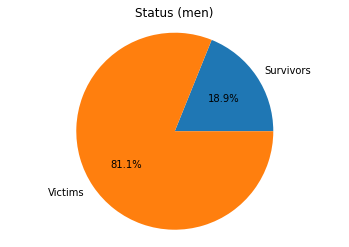

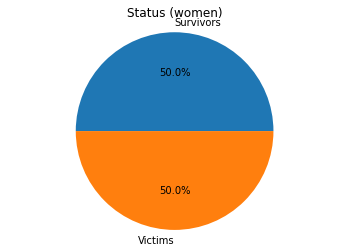

In [42]:
#Pie chart with gender survival rates
import matplotlib.pyplot as plt

MStatus = [msurcount,mcount-msurcount]

my_labels = 'Survivors','Victims'
plt.pie(MStatus, labels=my_labels, autopct='%1.1f%%')
plt.title('Status (men)')
plt.axis('equal')
plt.show()

FStatus = [fsurcount,fcount-fsurcount]

my_labels = 'Survivors','Victims'
plt.pie(FStatus, labels=my_labels, autopct='%1.1f%%')
plt.title('Status (women)')
plt.axis('equal')
plt.show()

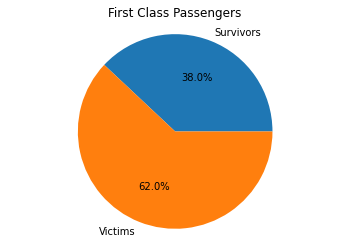

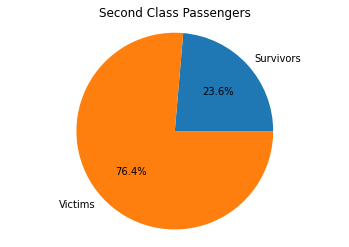

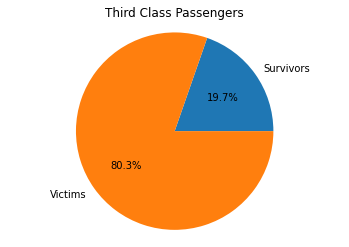

In [43]:
#Pie charts with passenger class survival rates
c1pas = dfs[dfs.Pclass == 1]
c1count = len(c1pas.index)
c2pas = dfs[dfs.Pclass == 2]
c2count = len(c2pas.index)
c3pas = dfs[dfs.Pclass == 3]
c3count = len(c3pas.index)

c1survivors = dfs[(dfs.Survived == 1) & (dfs.Pclass == 1)]
c1surcount = len(c1survivors.index)
c2survivors = dfs[(dfs.Survived == 1) & (dfs.Pclass == 2)]
c2surcount = len(c2survivors.index)
c3survivors = dfs[(dfs.Survived == 1) & (dfs.Pclass == 3)]
c3surcount = len(c3survivors.index)

c1status = [c1surcount,c1count-c1surcount]

my_labels = 'Survivors','Victims'
plt.pie(c1status, labels=my_labels, autopct='%1.1f%%')
plt.title('First Class Passengers')
plt.axis('equal')
plt.show()

c2status = [c2surcount,c2count-c2surcount]

my_labels = 'Survivors','Victims'
plt.pie(c2status, labels=my_labels, autopct='%1.1f%%')
plt.title('Second Class Passengers')
plt.axis('equal')
plt.show()

c3status = [c3surcount,c3count-c3surcount]

my_labels = 'Survivors','Victims'
plt.pie(c3status, labels=my_labels, autopct='%1.1f%%')
plt.title('Third Class Passengers')
plt.axis('equal')
plt.show()

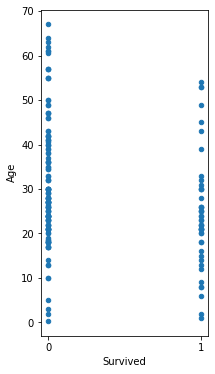

In [44]:
#Scatterplot with ages against survival status
dfs.plot.scatter(x = 'Survived', y = 'Age', xticks = [0,1], figsize = [3,6])

In [45]:
#Check age statistics with respect to survival rate
print('Survivors\'s mean age: ', round(survivors.Age.mean(),1))
print('Survivors\'s age standard dev: ', round(survivors.Age.std(),1))
print('Victims\'s mean age: ', round(victims.Age.mean(),1))
print('Victims\'s age standard dev: ',round(victims.Age.std(),1))

Survivors's mean age:  24.4
Survivors's age standard dev:  12.6
Victims's mean age:  31.1
Victims's age standard dev:  13.6
